### Import

In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib
import seaborn as sns

# 각 라이브러리 버전 출력
print("Numpy version:", np.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

c:\Users\hoyeong\anaconda3\envs\lg_ai\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Numpy version: 1.26.4
Scikit-learn version: 1.5.1
Pandas version: 1.5.3
Matplotlib version: 3.9.2
Seaborn version: 0.13.2


In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import  OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier

### Data Load

In [3]:
import sys
import os
import pandas as pd

# 현재 작업 디렉토리 경로를 가져와 shared codes 폴더의 위치를 sys.path에 추가합니다.
# sys.path에 추가된 경로에 있는 py 폴더는 임포트할 수 있다.
current_dir = os.getcwd()
shared_codes_dir = os.path.join(current_dir, '../shared codes')
sys.path.append(shared_codes_dir)


# cover_nan 모듈을 임포트
from cover_nan import missing_value_removal_function

# 원본 train 데이터 로드
train = pd.read_csv("../shared codes/data/train.csv").drop(columns=['ID'])
test = pd.read_csv("../shared codes/data/test.csv").drop(columns=['ID'])

# missing_value_removal_function 사용
train = missing_value_removal_function(train)
test = missing_value_removal_function(test)

✅ '대리모 여부' 결측값을 최빈값 (0.0) 으로 대체 완료!
✅ 컬럼 삭제 완료: ['PGD 시술 여부', 'PGS 시술 여부']
✅ '대리모 여부' 결측값을 최빈값 (0.0) 으로 대체 완료!
✅ 컬럼 삭제 완료: ['PGD 시술 여부', 'PGS 시술 여부']


In [4]:
X = train.drop('임신 성공 여부', axis=1)
y = train['임신 성공 여부']

### Data Pre-processing

In [5]:
# columns_fill_zero = [
#     # 'PGD 시술 여부', 'PGS 시술 여부',
#     '착상 전 유전 검사 사용 여부', '착상 전 유전 진단 사용 여부'
# ]
# X[columns_fill_zero] = X[columns_fill_zero].fillna(0)
# test[columns_fill_zero] = test[columns_fill_zero].fillna(0)

In [6]:

# X['난자 채취 경과일'].fillna(1, inplace=True)
# X['난자 해동 경과일'].fillna(0, inplace=True)
# X['난자 혼합 경과일'].fillna(0, inplace=True)
# X['배아 이식 경과일'].fillna(0, inplace=True)
# X['배아 해동 경과일'].fillna(0, inplace=True)

# test['난자 채취 경과일'].fillna(1, inplace=True)
# test['난자 해동 경과일'].fillna(0, inplace=True)
# test['난자 혼합 경과일'].fillna(0, inplace=True)
# test['배아 이식 경과일'].fillna(0, inplace=True)
# test['배아 해동 경과일'].fillna(0, inplace=True)

# # 병합할 칼럼들
# columns_to_merge = [
#     '난자 채취 경과일', '난자 해동 경과일', '난자 혼합 경과일',
#     '배아 이식 경과일', '배아 해동 경과일'
# ]

# # 새로운 칼럼 생성: 각 경과일의 합
# X['총 경과일'] = X[columns_to_merge].sum(axis=1)

# # 기존 칼럼 제거
# X = X.drop(columns=columns_to_merge)

# # 새로운 칼럼 생성: 각 경과일의 합
# test['총 경과일'] = test[columns_to_merge].sum(axis=1)

# # 기존 칼럼 제거
# test = test.drop(columns=columns_to_merge)

In [7]:
# 각 열의 결측값 개수 확인
missing_values_count = X.isnull().sum()

# 결측값이 있는 열만 필터링
missing_columns = missing_values_count[missing_values_count > 0]

print("결측값이 있는 열과 개수:")
print(missing_columns)

결측값이 있는 열과 개수:
착상 전 유전 검사 사용 여부    253633
착상 전 유전 진단 사용 여부      6291
난자 채취 경과일            57488
난자 해동 경과일           254915
난자 혼합 경과일            53735
배아 이식 경과일            43566
배아 해동 경과일           215982
dtype: int64


In [8]:
# '알 수 없음'이 포함된 열 찾기
unknown_columns = []

for col in X.columns:
    if X[col].astype(str).str.contains('알 수 없음').any():
        unknown_columns.append(col)

# 결과 출력
print("⚠️ '알 수 없음' 값을 포함하는 컬럼들:")
print(unknown_columns)


⚠️ '알 수 없음' 값을 포함하는 컬럼들:
['시술 당시 나이', '배란 유도 유형', '난자 기증자 나이', '정자 기증자 나이']


In [9]:
# '알 수 없음'이 포함된 열 찾기
unknown_columns = []

for col in X.columns:
    if X[col].astype(str).str.contains('nan').any():
        unknown_columns.append(col)

# 결과 출력
print("⚠️ 'nan' 값을 포함하는 컬럼들:")
print(unknown_columns)


⚠️ 'nan' 값을 포함하는 컬럼들:
['착상 전 유전 검사 사용 여부', '착상 전 유전 진단 사용 여부', '난자 채취 경과일', '난자 해동 경과일', '난자 혼합 경과일', '배아 이식 경과일', '배아 해동 경과일']


In [10]:
# NaN 값이 존재하는 컬럼 찾기
unknown_columns = X.columns[X.isna().any()].tolist()

unknown_columns

['착상 전 유전 검사 사용 여부',
 '착상 전 유전 진단 사용 여부',
 '난자 채취 경과일',
 '난자 해동 경과일',
 '난자 혼합 경과일',
 '배아 이식 경과일',
 '배아 해동 경과일']

In [11]:
# Categorical(범주형) 칼럼 찾기
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_columns:
    X[col] = X[col].astype(str)
    test[col] = test[col].astype(str)

# 결과 출력
print("📌 Categorical(범주형) 칼럼 리스트:")
print(categorical_columns)


📌 Categorical(범주형) 칼럼 리스트:
['시술 시기 코드', '시술 당시 나이', '시술 유형', '특정 시술 유형', '배란 유도 유형', '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '난자 출처', '정자 출처', '난자 기증자 나이', '정자 기증자 나이']


In [12]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_encoded = X.copy()
X_train_encoded[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

X_test_encoded = test.copy()
X_test_encoded[categorical_columns] = ordinal_encoder.transform(test[categorical_columns])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 61
[LightGBM] [Info] Start training from score 0.258933


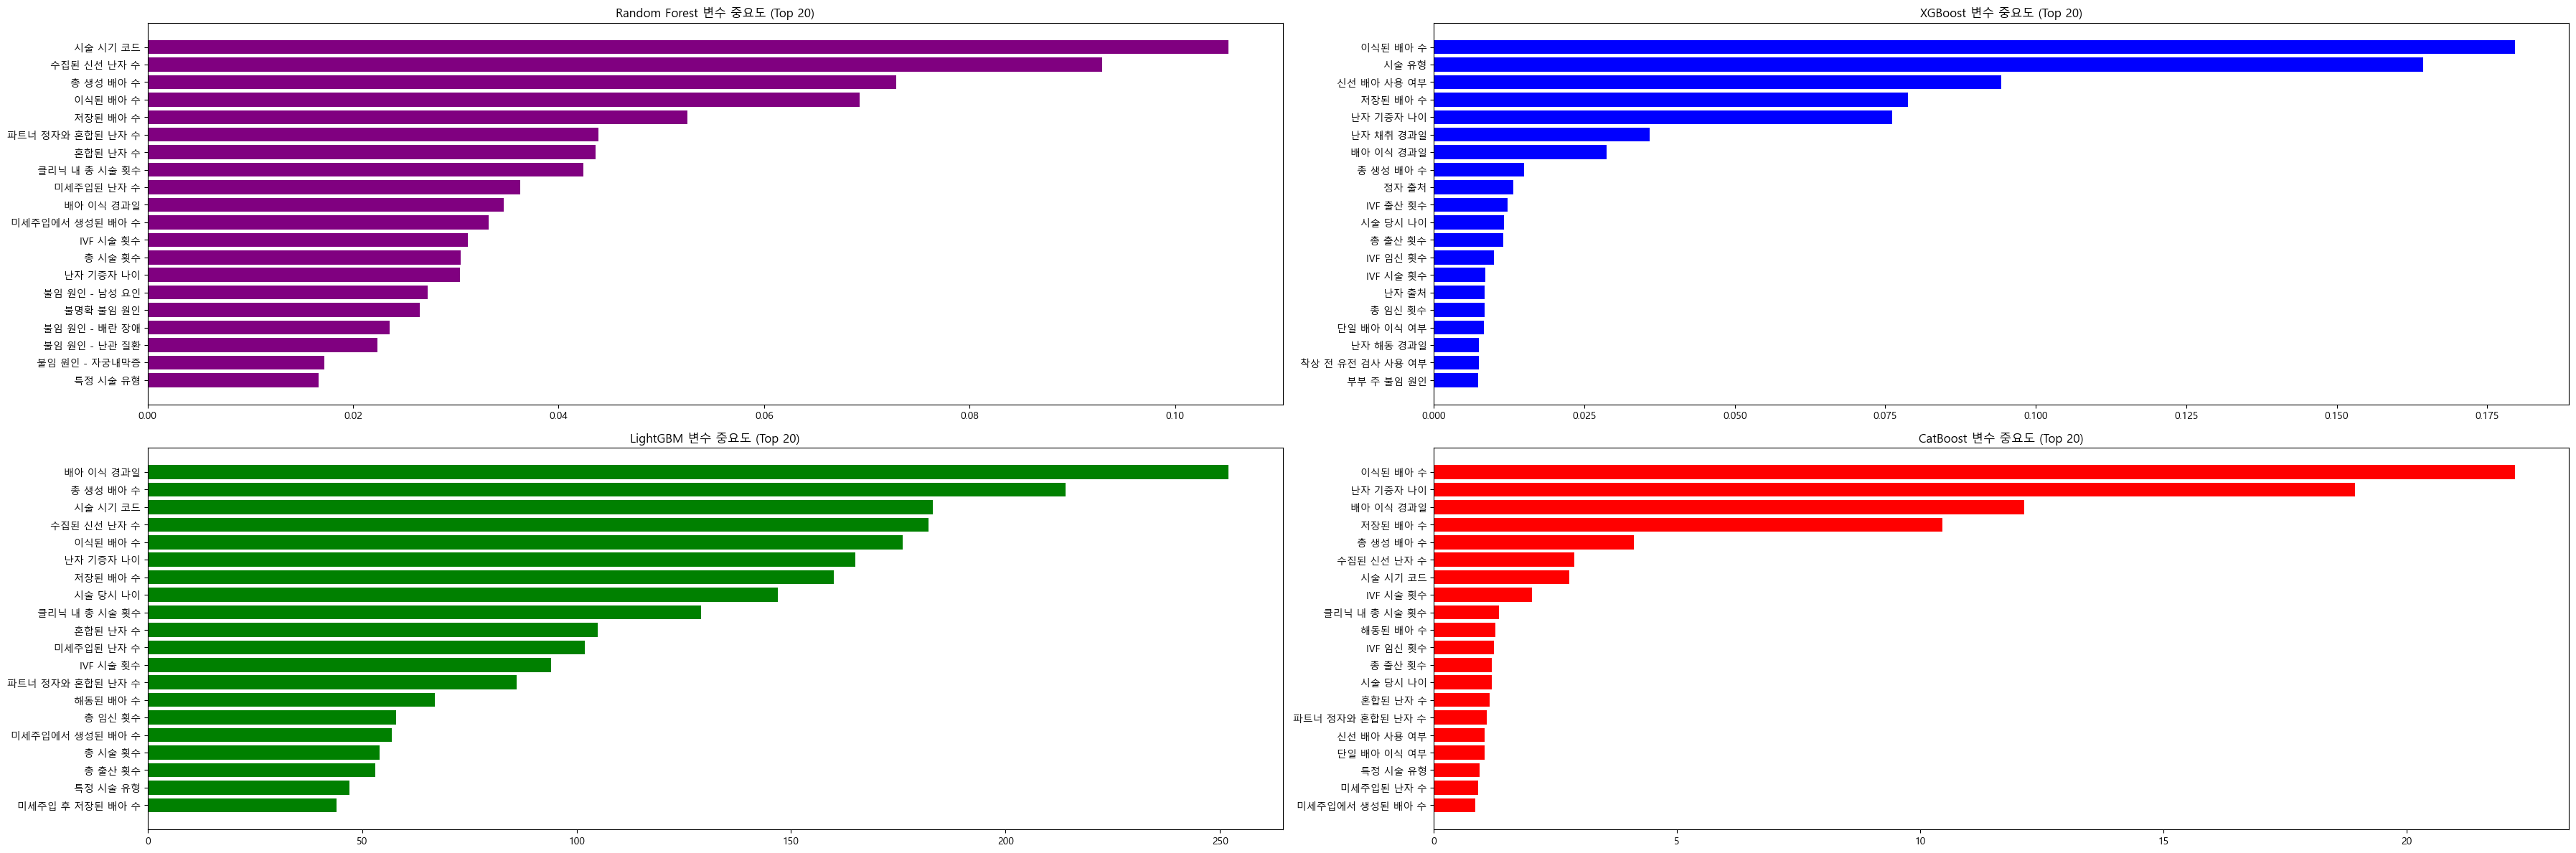

In [13]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

# 🔹 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows (맑은 고딕)
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac (애플 고딕)
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux (나눔 고딕)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 🔹 데이터 준비 (X_train_encoded 사용)
X_train, X_test, y_train, y_test = train_test_split(X_train_encoded, y, test_size=0.2, random_state=42)

# 1️⃣ 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2️⃣ XGBoost 모델 학습
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# 3️⃣ LightGBM 모델 학습
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# 4️⃣ CatBoost 모델 학습
cat_model = CatBoostRegressor(iterations=100, verbose=0, random_seed=42)
cat_model.fit(X_train, y_train)

# 🔹 변수 중요도 추출
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
lgb_importances = lgb_model.feature_importances_
cat_importances = cat_model.get_feature_importance()

feature_names = X_train.columns

# 🔹 중요도 데이터프레임 생성
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest': rf_importances,
    'XGBoost': xgb_importances,
    'LightGBM': lgb_importances,
    'CatBoost': cat_importances
})

# 🔹 상위 20개만 정렬하여 가져오기
top_n = 20
importance_rf = importance_df.nlargest(top_n, 'RandomForest')
importance_xgb = importance_df.nlargest(top_n, 'XGBoost')
importance_lgb = importance_df.nlargest(top_n, 'LightGBM')
importance_cat = importance_df.nlargest(top_n, 'CatBoost')

# 🔹 시각화 (각 모델별 개별 정렬)
fig, axes = plt.subplots(2, 2, figsize=(36, 12))

# Random Forest Feature Importance (상위 20개)
axes[0, 0].barh(importance_rf['Feature'], importance_rf['RandomForest'], color='purple')
axes[0, 0].set_title("Random Forest 변수 중요도 (Top 20)")
axes[0, 0].invert_yaxis()

# XGBoost Feature Importance (상위 20개)
axes[0, 1].barh(importance_xgb['Feature'], importance_xgb['XGBoost'], color='blue')
axes[0, 1].set_title("XGBoost 변수 중요도 (Top 20)")
axes[0, 1].invert_yaxis()

# LightGBM Feature Importance (상위 20개)
axes[1, 0].barh(importance_lgb['Feature'], importance_lgb['LightGBM'], color='green')
axes[1, 0].set_title("LightGBM 변수 중요도 (Top 20)")
axes[1, 0].invert_yaxis()

# CatBoost Feature Importance (상위 20개)
axes[1, 1].barh(importance_cat['Feature'], importance_cat['CatBoost'], color='red')
axes[1, 1].set_title("CatBoost 변수 중요도 (Top 20)")
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()


🔹 RandomForest 상위 50개 변수: ['시술 시기 코드', '수집된 신선 난자 수', '총 생성 배아 수', '이식된 배아 수', '저장된 배아 수', '파트너 정자와 혼합된 난자 수', '혼합된 난자 수', '클리닉 내 총 시술 횟수', '미세주입된 난자 수', '배아 이식 경과일', '미세주입에서 생성된 배아 수', 'IVF 시술 횟수', '총 시술 횟수', '난자 기증자 나이', '불임 원인 - 남성 요인', '불명확 불임 원인', '불임 원인 - 배란 장애', '불임 원인 - 난관 질환', '불임 원인 - 자궁내막증', '특정 시술 유형', '시술 당시 나이', '해동된 배아 수', '단일 배아 이식 여부', '정자 기증자 나이', '미세주입 후 저장된 배아 수', '총 임신 횟수', '미세주입 배아 이식 수', 'IVF 임신 횟수', '기증자 정자와 혼합된 난자 수', 'DI 시술 횟수', '총 출산 횟수', 'IVF 출산 횟수', '착상 전 유전 진단 사용 여부', '난자 출처', '여성 주 불임 원인', '정자 출처', '배란 자극 여부', '남성 주 불임 원인', '부부 주 불임 원인', '배란 유도 유형', '남성 부 불임 원인', '해동 난자 수', '난자 혼합 경과일', '여성 부 불임 원인', '부부 부 불임 원인', '기증 배아 사용 여부', '대리모 여부', '시술 유형', 'DI 임신 횟수', 'DI 출산 횟수']
🔹 XGBoost 상위 50개 변수: ['이식된 배아 수', '시술 유형', '신선 배아 사용 여부', '저장된 배아 수', '난자 기증자 나이', '난자 채취 경과일', '배아 이식 경과일', '총 생성 배아 수', '정자 출처', 'IVF 출산 횟수', '시술 당시 나이', '총 출산 횟수', 'IVF 임신 횟수', 'IVF 시술 횟수', '난자 출처', '총 임신 횟수', '단일 배아 이식 여부', '난자 해동 경과일', '착상 전 유전 검사 사용 여부', '부부 주 불임 원인', '수집된 신선 난자 수',

<Figure size 1200x800 with 0 Axes>

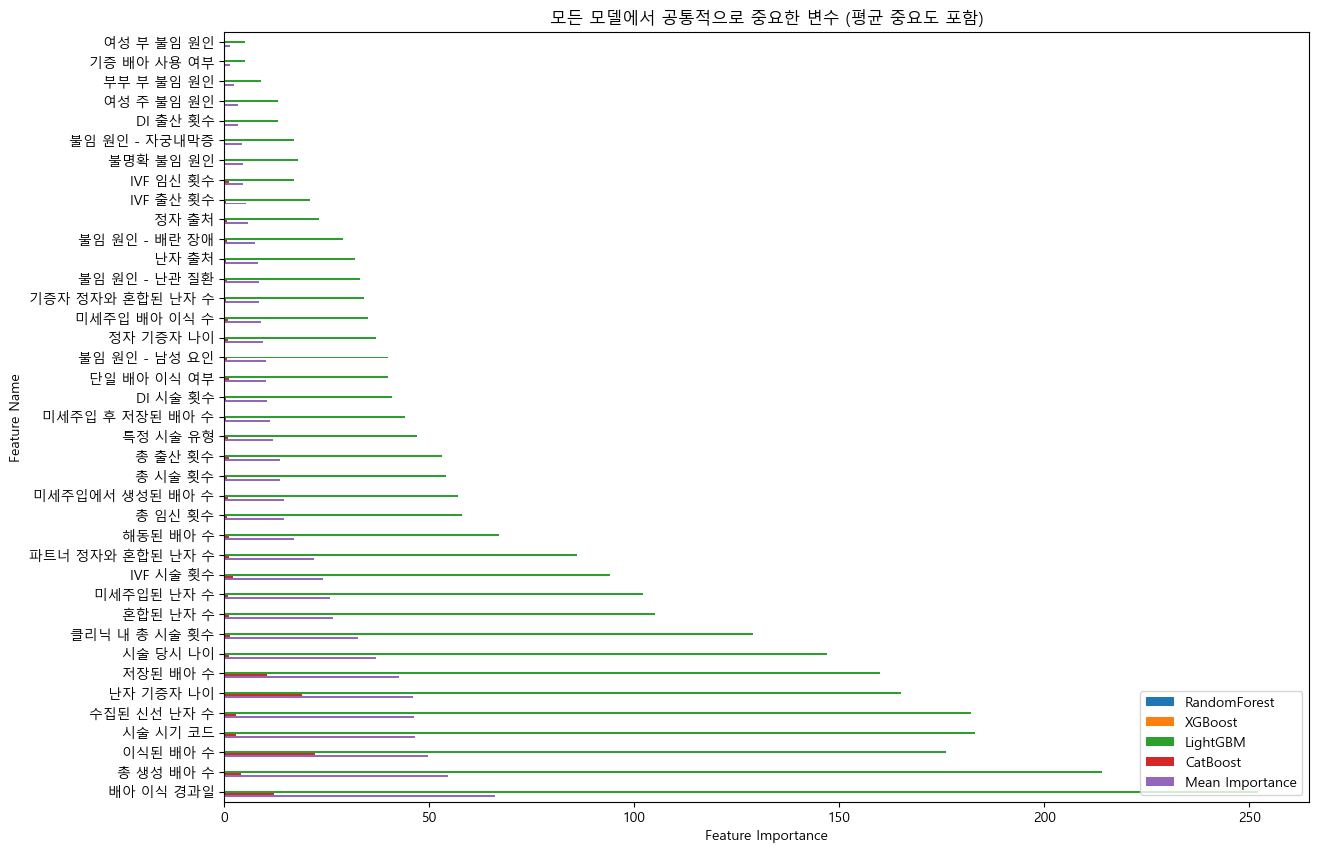

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 상위 N개의 중요한 변수 선택
top_n = 50  # 원하는 개수 지정

# 🔹 모델별로 가장 중요한 N개 변수 선택
top_rf = importance_df.nlargest(top_n, 'RandomForest')['Feature'].tolist()
top_xgb = importance_df.nlargest(top_n, 'XGBoost')['Feature'].tolist()
top_lgb = importance_df.nlargest(top_n, 'LightGBM')['Feature'].tolist()
top_cat = importance_df.nlargest(top_n, 'CatBoost')['Feature'].tolist()

# 🔹 각 모델에서 중요도가 높은 변수 출력
print(f"🔹 RandomForest 상위 {top_n}개 변수: {top_rf}")
print(f"🔹 XGBoost 상위 {top_n}개 변수: {top_xgb}")
print(f"🔹 LightGBM 상위 {top_n}개 변수: {top_lgb}")
print(f"🔹 CatBoost 상위 {top_n}개 변수: {top_cat}")

# 🔹 모든 모델에서 공통적으로 중요한 변수 찾기
common_features = set(top_rf) & set(top_xgb) & set(top_lgb) & set(top_cat)
print(f"⭐️ 모든 모델에서 중요한 변수: {common_features}")

# 🔹 공통 변수들의 중요도 평균 계산
top_features_df = importance_df[importance_df['Feature'].isin(common_features)].copy()
top_features_df['Mean Importance'] = top_features_df[['RandomForest', 'XGBoost', 'LightGBM', 'CatBoost']].mean(axis=1)

# 🔹 변수 중요도 수치화 출력
print("\n📊 모델별 변수 중요도 평균값:")
print(top_features_df[['Feature', 'RandomForest', 'XGBoost', 'LightGBM', 'CatBoost', 'Mean Importance']])

# 🔹 시각화 (공통 중요 변수)
plt.figure(figsize=(12, 8))
top_features_df.set_index('Feature').sort_values(by="Mean Importance").plot(kind='barh', figsize=(14, 10))
plt.title("모든 모델에서 공통적으로 중요한 변수 (평균 중요도 포함)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.gca().invert_yaxis()  # 중요도 높은 순 정렬
plt.legend(loc="lower right")
plt.show()


In [15]:
len(top_features_df)

39

In [13]:
columns_to_drop = [
        "남성 주 불임 원인",
        "남성 부 불임 원인",
        "불임 원인 - 정자 농도",
        "불임 원인 - 정자 면역학적 요인",
        "불임 원인 - 정자 운동성",
        "불임 원인 - 정자 형태",
        '정자 기증자 나이',
        '배란 유도 유형'
]
X_train_encoded = X_train_encoded.drop(columns = columns_to_drop)    
X_test_encoded = X_test_encoded.drop(columns = columns_to_drop)  

In [14]:
# 각 열의 결측값 개수 확인
missing_values_count = X_train_encoded.isnull().sum()

# 결측값이 있는 열만 필터링
missing_columns = missing_values_count[missing_values_count > 0]

print("결측값이 있는 열과 개수:")
print(missing_columns)


결측값이 있는 열과 개수:
Series([], dtype: int64)


In [15]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 52 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   시술 시기 코드          256351 non-null  float64
 1   시술 당시 나이          256351 non-null  float64
 2   시술 유형             256351 non-null  float64
 3   특정 시술 유형          256351 non-null  float64
 4   배란 자극 여부          256351 non-null  int64  
 5   단일 배아 이식 여부       256351 non-null  float64
 6   착상 전 유전 검사 사용 여부  256351 non-null  float64
 7   착상 전 유전 진단 사용 여부  256351 non-null  float64
 8   여성 주 불임 원인        256351 non-null  int64  
 9   여성 부 불임 원인        256351 non-null  int64  
 10  부부 주 불임 원인        256351 non-null  int64  
 11  부부 부 불임 원인        256351 non-null  int64  
 12  불명확 불임 원인         256351 non-null  int64  
 13  불임 원인 - 난관 질환     256351 non-null  int64  
 14  불임 원인 - 남성 요인     256351 non-null  int64  
 15  불임 원인 - 배란 장애     256351 non-null  int64  
 16  불임 원인 - 여성 요인     25

In [16]:

X_train_encoded['배아 생성 주요 이유'].value_counts()

배아 생성 주요 이유
1    253108
0      3243
Name: count, dtype: int64

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 데이터 정규화 (X_train_encoded & X_test_encoded)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)  # 동일한 스케일 적용

# DataFrame 변환 (Feature 이름 유지)
feature_names = [f"Feature_{i}" for i in range(X_train_scaled.shape[1])]
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# 상관 행렬 계산
correlation_matrix_train = X_train_scaled_df.corr()

# 다중 공선성이 높은 칼럼 찾기 (절대 상관 계수가 0.8 이상)
threshold = 0.8
high_corr_features = set()

for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        if abs(correlation_matrix_train.iloc[i, j]) > threshold:
            high_corr_features.add(feature_names[j])  # 공선성이 높은 컬럼 추가

# 다중 공선성이 높은 컬럼 제거
X_train_encoded = X_train_scaled_df.drop(columns=high_corr_features, errors='ignore')
X_test_encoded = X_test_scaled_df.drop(columns=high_corr_features, errors='ignore')


In [18]:
X_train_encoded

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_38,Feature_39,Feature_40,Feature_43,Feature_44,Feature_45,Feature_47,Feature_49,Feature_50,Feature_51
0,1.518507,-0.935575,0.158613,-0.962962,0.544551,-0.543057,-0.103519,-0.11236,-0.178038,-0.112199,...,-0.066583,-0.184224,-0.083423,-0.220261,0.256018,0.344047,-0.430784,-0.098393,-0.0641,0.033850
1,1.020975,2.655919,0.158613,-0.962962,-1.836376,-0.543057,-0.103519,-0.11236,-0.178038,-0.112199,...,-0.066583,-1.000848,-0.083423,-0.220261,0.256018,0.344047,-0.430784,-0.098393,-0.0641,-1.586105
2,0.025910,-0.935575,0.158613,0.672585,0.544551,-0.543057,-0.103519,-0.11236,-0.178038,-0.112199,...,-0.066583,-0.048121,-0.083423,-0.220261,0.256018,0.344047,-0.430784,-0.098393,-0.0641,-0.506135
3,-0.471622,-0.217277,0.158613,-0.962962,0.544551,-0.543057,-0.103519,-0.11236,-0.178038,-0.112199,...,-0.066583,-0.456432,-0.083423,-0.220261,0.256018,0.344047,-0.430784,-0.098393,-0.0641,-1.586105
4,0.025910,-0.935575,0.158613,-0.962962,0.544551,-0.543057,-0.103519,-0.11236,-0.178038,-0.112199,...,-0.066583,-0.184224,-0.083423,-0.220261,0.256018,0.344047,-0.430784,-0.098393,-0.0641,0.033850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256346,1.020975,-0.935575,0.158613,-0.962962,0.544551,-0.543057,-0.103519,-0.11236,-0.178038,-0.112199,...,-0.066583,0.360191,-0.083423,-0.220261,0.256018,0.344047,-0.430784,-0.098393,-0.0641,1.113821
256347,1.020975,0.501022,0.158613,-0.962962,0.544551,-0.543057,-0.103519,-0.11236,-0.178038,-0.112199,...,-0.066583,-0.456432,-0.083423,-0.220261,0.256018,0.344047,-0.430784,-0.098393,-0.0641,0.033850
256348,0.025910,-0.217277,0.158613,-0.962962,0.544551,-0.543057,-0.103519,-0.11236,-0.178038,-0.112199,...,-0.066583,0.224087,-0.083423,-0.220261,0.256018,0.344047,-0.430784,-0.098393,-0.0641,0.033850
256349,1.518507,0.501022,0.158613,-0.962962,0.544551,-0.543057,-0.103519,-0.11236,-0.178038,-0.112199,...,-0.066583,-0.728640,-0.083423,-0.220261,0.256018,0.344047,-0.430784,-0.098393,-0.0641,-1.046120


### Train

In [19]:
model = ExtraTreesClassifier(random_state=42)

model.fit(X_train_encoded, y)

ExtraTreesClassifier(random_state=42)

**앙상블 및 Optuna**

In [20]:
import optuna
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [21]:
def optimize_xgboost(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5)
    }
    model = XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric="logloss")
    scores = cross_val_score(model, X_train_encoded, y, cv=5, scoring="roc_auc")
    return np.mean(scores)

In [22]:
def optimize_lightgbm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 10, 50),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0)
    }
    model = LGBMClassifier(**params, random_state=42)
    scores = cross_val_score(model, X_train_encoded, y, cv=5, scoring="roc_auc")  
    return np.mean(scores)

In [23]:
def optimize_random_forest(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_samples_split": trial.suggest_int("min_samples_split", 3, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 4)
    }
    model = RandomForestClassifier(**params, random_state=42)
    scores = cross_val_score(model, X_train_encoded, y, cv=5, scoring="roc_auc")  
    return np.mean(scores)


In [24]:
# Optuna 스터디 실행
print("Optimizing XGBoost...")
xgb_study = optuna.create_study(direction="maximize")
xgb_study.optimize(optimize_xgboost, n_trials=30)
best_xgb_params = xgb_study.best_params

print("Optimizing LightGBM...")
lgbm_study = optuna.create_study(direction="maximize")
lgbm_study.optimize(optimize_lightgbm, n_trials=30)
best_lgbm_params = lgbm_study.best_params

print("Optimizing RandomForest...")
rf_study = optuna.create_study(direction="maximize")
rf_study.optimize(optimize_random_forest, n_trials=30)
best_rf_params = rf_study.best_params

[I 2025-02-16 20:16:10,036] A new study created in memory with name: no-name-95c7c364-0845-496d-b8da-4dd71d771b19


Optimizing XGBoost...


c:\Users\hoyeong\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:16:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\hoyeong\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:16:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\hoyeong\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:16:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\hoyeong\anaconda3\Lib\site-p

Optimizing LightGBM...
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [

[I 2025-02-16 20:19:16,867] Trial 0 finished with value: 0.7344430137460923 and parameters: {'n_estimators': 113, 'max_depth': 10, 'learning_rate': 0.2608442054971969, 'num_leaves': 50, 'subsample': 0.6862036187656735}. Best is trial 0 with value: 0.7344430137460923.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data po

[I 2025-02-16 20:19:20,029] Trial 1 finished with value: 0.7365769846444623 and parameters: {'n_estimators': 148, 'max_depth': 12, 'learning_rate': 0.174216740152415, 'num_leaves': 32, 'subsample': 0.9340971542947667}. Best is trial 1 with value: 0.7365769846444623.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 205081, number of used features: 39
[LightGBM] [Info

[I 2025-02-16 20:19:22,895] Trial 2 finished with value: 0.7375244898284459 and parameters: {'n_estimators': 165, 'max_depth': 7, 'learning_rate': 0.27740095366999834, 'num_leaves': 10, 'subsample': 0.7899675477159612}. Best is trial 2 with value: 0.7375244898284459.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-16 20:19:26,269] Trial 3 finished with value: 0.7335944686682608 and parameters: {'n_estimators': 153, 'max_depth': 9, 'learning_rate': 0.2505509239927823, 'num_leaves': 48, 'subsample': 0.8587736510951358}. Best is trial 2 with value: 0.7375244898284459.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007555 seconds.
You can set `force_row_wise=true` to rem

[I 2025-02-16 20:19:29,469] Trial 4 finished with value: 0.7386229785079458 and parameters: {'n_estimators': 186, 'max_depth': 11, 'learning_rate': 0.09910689138777319, 'num_leaves': 10, 'subsample': 0.6420066184754253}. Best is trial 4 with value: 0.7386229785079458.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 205081, number of used features: 39
[LightGBM] [Info

[I 2025-02-16 20:19:33,245] Trial 5 finished with value: 0.7352959417792462 and parameters: {'n_estimators': 199, 'max_depth': 12, 'learning_rate': 0.21205918857242959, 'num_leaves': 41, 'subsample': 0.857339363057472}. Best is trial 4 with value: 0.7386229785079458.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 205081, number of used features: 39
[LightGBM] [Info

[I 2025-02-16 20:19:39,288] Trial 6 finished with value: 0.7386713228338154 and parameters: {'n_estimators': 429, 'max_depth': 5, 'learning_rate': 0.03590432531675154, 'num_leaves': 15, 'subsample': 0.7697002389282264}. Best is trial 6 with value: 0.7386713228338154.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

[I 2025-02-16 20:19:45,288] Trial 7 finished with value: 0.7384943030012572 and parameters: {'n_estimators': 297, 'max_depth': 11, 'learning_rate': 0.03331061593816049, 'num_leaves': 43, 'subsample': 0.6086860845330704}. Best is trial 6 with value: 0.7386713228338154.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-16 20:19:52,416] Trial 8 finished with value: 0.730526200554202 and parameters: {'n_estimators': 488, 'max_depth': 7, 'learning_rate': 0.19122860147542714, 'num_leaves': 41, 'subsample': 0.7656154184999159}. Best is trial 6 with value: 0.7386713228338154.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-16 20:19:58,998] Trial 9 finished with value: 0.7290761874589751 and parameters: {'n_estimators': 388, 'max_depth': 9, 'learning_rate': 0.2470065547282461, 'num_leaves': 50, 'subsample': 0.790552526193436}. Best is trial 6 with value: 0.7386713228338154.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-16 20:20:05,080] Trial 10 finished with value: 0.7372133384142645 and parameters: {'n_estimators': 485, 'max_depth': 3, 'learning_rate': 0.023559447133018704, 'num_leaves': 20, 'subsample': 0.9776896630715548}. Best is trial 6 with value: 0.7386713228338154.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006794 seconds.
You can set `force_row_wise=true` to rem

[I 2025-02-16 20:20:08,939] Trial 11 finished with value: 0.7386847662062405 and parameters: {'n_estimators': 257, 'max_depth': 4, 'learning_rate': 0.09663656856220502, 'num_leaves': 12, 'subsample': 0.6787235224621451}. Best is trial 11 with value: 0.7386847662062405.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-16 20:20:13,230] Trial 12 finished with value: 0.7386573567287247 and parameters: {'n_estimators': 288, 'max_depth': 4, 'learning_rate': 0.09699024275163332, 'num_leaves': 19, 'subsample': 0.7078693892566325}. Best is trial 11 with value: 0.7386847662062405.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-16 20:20:18,530] Trial 13 finished with value: 0.7383181919007699 and parameters: {'n_estimators': 382, 'max_depth': 5, 'learning_rate': 0.0858329747897922, 'num_leaves': 18, 'subsample': 0.729262076480111}. Best is trial 11 with value: 0.7386847662062405.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-16 20:20:23,974] Trial 14 finished with value: 0.7366415761763945 and parameters: {'n_estimators': 379, 'max_depth': 5, 'learning_rate': 0.13301105962947973, 'num_leaves': 26, 'subsample': 0.6569030458489644}. Best is trial 11 with value: 0.7386847662062405.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 205081, number of used features: 39
[LightGBM] [Info

[I 2025-02-16 20:20:28,139] Trial 15 finished with value: 0.7387415161108659 and parameters: {'n_estimators': 243, 'max_depth': 6, 'learning_rate': 0.053774755048944134, 'num_leaves': 15, 'subsample': 0.8575677919404017}. Best is trial 15 with value: 0.7387415161108659.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhea

[I 2025-02-16 20:20:32,394] Trial 16 finished with value: 0.7386233083811027 and parameters: {'n_estimators': 239, 'max_depth': 6, 'learning_rate': 0.06612692217040536, 'num_leaves': 26, 'subsample': 0.8593636642046979}. Best is trial 15 with value: 0.7387415161108659.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-16 20:20:35,832] Trial 17 finished with value: 0.7385661420119265 and parameters: {'n_estimators': 240, 'max_depth': 3, 'learning_rate': 0.13672574504569365, 'num_leaves': 14, 'subsample': 0.9143358565885228}. Best is trial 15 with value: 0.7387415161108659.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 205081, number of used features: 39
[LightGBM] [Info

[I 2025-02-16 20:20:40,984] Trial 18 finished with value: 0.738544829246129 and parameters: {'n_estimators': 330, 'max_depth': 8, 'learning_rate': 0.06550251359699268, 'num_leaves': 24, 'subsample': 0.8301543291737288}. Best is trial 15 with value: 0.7387415161108659.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-16 20:20:45,010] Trial 19 finished with value: 0.737187995753169 and parameters: {'n_estimators': 227, 'max_depth': 6, 'learning_rate': 0.1268886172199321, 'num_leaves': 32, 'subsample': 0.9101559653885936}. Best is trial 15 with value: 0.7387415161108659.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -

[I 2025-02-16 20:20:49,213] Trial 20 finished with value: 0.7386330181687557 and parameters: {'n_estimators': 272, 'max_depth': 4, 'learning_rate': 0.0634503016376845, 'num_leaves': 15, 'subsample': 0.6085381554709577}. Best is trial 15 with value: 0.7387415161108659.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[I 2025-02-16 20:20:55,698] Trial 21 finished with value: 0.7380469548212292 and parameters: {'n_estimators': 438, 'max_depth': 5, 'learning_rate': 0.018469305546878312, 'num_leaves': 14, 'subsample': 0.7477016688878879}. Best is trial 15 with value: 0.7387415161108659.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data po

[I 2025-02-16 20:21:01,206] Trial 22 finished with value: 0.7387508948595363 and parameters: {'n_estimators': 340, 'max_depth': 6, 'learning_rate': 0.04027497780496548, 'num_leaves': 22, 'subsample': 0.8257584242119438}. Best is trial 22 with value: 0.7387508948595363.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data po

[I 2025-02-16 20:21:06,480] Trial 23 finished with value: 0.7387362496017023 and parameters: {'n_estimators': 336, 'max_depth': 6, 'learning_rate': 0.0521631422441746, 'num_leaves': 22, 'subsample': 0.8221143313010851}. Best is trial 22 with value: 0.7387508948595363.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007375 seconds.
You can set `force_row_wise=true` to rem

[I 2025-02-16 20:21:11,673] Trial 24 finished with value: 0.7387510938004842 and parameters: {'n_estimators': 334, 'max_depth': 6, 'learning_rate': 0.05711281803665102, 'num_leaves': 23, 'subsample': 0.8337439510172372}. Best is trial 24 with value: 0.7387510938004842.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 205081, number of used features: 39
[LightGBM] [Info

[I 2025-02-16 20:21:17,430] Trial 25 finished with value: 0.7385871219070104 and parameters: {'n_estimators': 339, 'max_depth': 8, 'learning_rate': 0.04694406682953989, 'num_leaves': 29, 'subsample': 0.8740982330819485}. Best is trial 24 with value: 0.7387510938004842.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-02-16 20:21:22,666] Trial 26 finished with value: 0.7366232981725269 and parameters: {'n_estimators': 324, 'max_depth': 7, 'learning_rate': 0.11362680522177754, 'num_leaves': 36, 'subsample': 0.8166069238585182}. Best is trial 24 with value: 0.7387510938004842.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

[I 2025-02-16 20:21:28,964] Trial 27 finished with value: 0.7374770927229268 and parameters: {'n_estimators': 358, 'max_depth': 6, 'learning_rate': 0.01319719577742625, 'num_leaves': 22, 'subsample': 0.8945647079010014}. Best is trial 24 with value: 0.7387510938004842.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 205081, number of used features: 39
[LightGBM] [Info

[I 2025-02-16 20:21:34,122] Trial 28 finished with value: 0.7360355245837298 and parameters: {'n_estimators': 438, 'max_depth': 8, 'learning_rate': 0.161482459917997, 'num_leaves': 17, 'subsample': 0.9510612283570673}. Best is trial 24 with value: 0.7387510938004842.


[LightGBM] [Info] Number of positive: 52982, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258348 -> initscore=-1.054573
[LightGBM] [Info] Start training from score -1.054573
[LightGBM] [Info] Number of positive: 52983, number of negative: 152098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 205081, number of used features: 39
[LightGBM] [Info

[I 2025-02-16 20:21:37,074] Trial 29 finished with value: 0.7387099890705857 and parameters: {'n_estimators': 119, 'max_depth': 9, 'learning_rate': 0.08316091661634574, 'num_leaves': 27, 'subsample': 0.8335663784249624}. Best is trial 24 with value: 0.7387510938004842.
[I 2025-02-16 20:21:37,075] A new study created in memory with name: no-name-9f5f7859-b573-4062-9fe3-95f74d3cb79b


Optimizing RandomForest...


[I 2025-02-16 20:22:11,052] Trial 0 finished with value: 0.7184035562635367 and parameters: {'n_estimators': 141, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7184035562635367.
[I 2025-02-16 20:23:17,819] Trial 1 finished with value: 0.7324764146637667 and parameters: {'n_estimators': 143, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.7324764146637667.
[I 2025-02-16 20:24:10,174] Trial 2 finished with value: 0.7333873556970283 and parameters: {'n_estimators': 104, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.7333873556970283.
[I 2025-02-16 20:25:54,164] Trial 3 finished with value: 0.7337183538498563 and parameters: {'n_estimators': 207, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.7337183538498563.
[I 2025-02-16 20:27:01,692] Trial 4 finished with value: 0.7313890041381319 and parameters: 

In [25]:
# 최적화된 모델 생성
xgb_model = XGBClassifier(**best_xgb_params, random_state=42, use_label_encoder=False, eval_metric="logloss")
lgbm_model = LGBMClassifier(**best_lgbm_params, random_state=42)
rf_model = RandomForestClassifier(**best_rf_params, random_state=42)

In [26]:
# XGBoost 모델의 파라미터 확인
print("XGBoost Best Parameters:")
print(xgb_model.get_params())

# LightGBM 모델의 파라미터 확인
print("\nLightGBM Best Parameters:")
print(lgbm_model.get_params())

# RandomForest 모델의 파라미터 확인
print("\nRandomForest Best Parameters:")
print(rf_model.get_params())

XGBoost Best Parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8487622591581592, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': 1.8293289192039388, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.03210640911709611, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 425, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8700485191186913, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder'

In [27]:
# Soft Voting 앙상블
ensemble_model = VotingClassifier(
    estimators=[
        ("xgb", xgb_model),
        ("lgbm", lgbm_model),
        ("rf", rf_model)
    ],
    voting="soft"
)

In [28]:
# 전체 데이터로 학습
ensemble_model.fit(X_train_encoded, y)

c:\Users\hoyeong\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:12:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 66228, number of negative: 190123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 256351, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258349 -> initscore=-1.054568
[LightGBM] [Info] Start training from score -1.054568
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8487622591581592,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            gamma=1.8293289192039388,
                                            grow_policy=None,
                                            importance_type=None,
                                            interac...
                                            n_estimators=425, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgbm',
                              LGBMClassifier(learning_rate=0.05711281803665102,
                                             max_depth=6, n_estimators=334,
                                             num_leaves=23, random_state=42,
                                             subsample=0.8337439510172372)),
                             ('rf',
                              RandomForestClassifier(max_depth=12,
                                                     min_samples_leaf=3,
                                                     min_samples_split=5,
                                                     n_estimators=276,
                                                     random_state=42))],
                 voting='soft')

### Predict

In [29]:
pred_proba = ensemble_model.predict_proba(X_test_encoded)[:, 1]

### Submission

In [30]:
sample_submission = pd.read_csv('../../sample_submission.csv')
sample_submission['probability'] = pred_proba

In [31]:
sample_submission.to_csv('./Result/baseline_submit.csv', index=False)

In [32]:
pred_proba

array([0.00341224, 0.00397266, 0.15047629, ..., 0.43625377, 0.25047644,
       0.00290478])

In [33]:
unique, counts = np.unique(sample_submission['probability'], return_counts=True)
print(unique, counts)

[1.79142742e-04 1.80215013e-04 2.08479061e-04 ... 6.88630623e-01
 6.90734825e-01 7.05926664e-01] [1 1 1 ... 1 1 1]
